# Modelling Optimal Strategies for a Single Car

This notebook summarises some examples of using the Python functions defined in *modelling_utilities.py* to optimise race strategy. Here, we are optimising the strategy for a car running on its own.

In [1]:
import Modelling_Utilities as mu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting the laptimes from a F1 Grand Prix

In [2]:
year = 2019
round_num = 2
driver_name = 'Sergio Pérez'

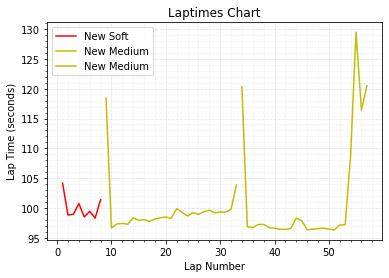

In [3]:
results_df = mu.download_laptimes(year, round_num, driver_name)
mu.plot_laptimes(results_df)

## Finding & plotting optimal strategies with known tyre deg variables

The code below plots the optimal strategy based off a quadratic tyre deg function.

For more details on the quadratic tyre deg function, please refer to the README document in the *modelling* folder.

**Mandatory Inputs**

In [4]:
laps_complete = 3 # Full racing laps already completed
total_race_laps = 52
pitstop_time = 24 # Total extra time in seconds to make a pitstop
current_tyre_description = 'Soft' # Either 'Soft', 'Medium' or 'Hard'
current_tyre_age = 3 # Total laps the current tyre has already done
need_to_use_different_tyre = True # Boolean, depending on whether you still need to use a different compound of tyre before the end of the race

# The following parameters will define the shape of the quadratic tyre deg curve
tyre_deg_curve = mu.tyre_deg_curve_quadratic
k = 0.6
d = 0.6
soft_tyre_deg_quadratic = 0.012,
soft_tyre_deg_linear = -0.01,
medium_tyre_pace_deficit = d,
medium_tyre_deg_quadratic = 0.012*k,
medium_tyre_deg_linear = -0.01*k,
hard_tyre_pace_deficit = 2*d,
hard_tyre_deg_quadratic = 0.012*(k**2),
hard_tyre_deg_linear = -0.01*(k**2)

**Optional Inputs**

In [11]:
max_pitstops = 3 # Here you can choose a maximum number of pitstops. The find_optimium_strategy function has a absolute maximum of 3 that it can handle, and by default this parameter is set to be 3.
base_laptime = 76.52 # The race laptime (measured in seconds) from a brand new Soft tyre with 1 lap of fuel remaining. By default, this is 0. (N.B. this parameter only affects the size of the laptimes - the choice of optimal strategy remains the same regardless of this parameter.)
fuel_laptime_correction = 0.06 # The improvement in laptime, measured in seconds per lap (assumed to be linear), from decreasing fuel load. This is assuming all other variables (including tyre deg) are constant. By default, this is 0. (N.B. this parameter only affects the size of the laptimes - the choice of optimal strategy remains the same regardless of this parameter.)
detailed_logs = True # Boolean, whether or not to return extra detail on where the function is up to in the batching process. Mainly used for diagnostics and/or understanding any processes taking a long time.
batch_size = 50000 # Controls the number of potential strategies that are computed over in a single batch. If you have issues with memory, then reduce this batch size.

Attempting optimisation with batch number = 0, df size 50000
Completed optimisation with batch number = 0
Attempting optimisation with batch number = 1, df size 50000
Completed optimisation with batch number = 1
Attempting optimisation with batch number = 2, df size 50000
Completed optimisation with batch number = 2
Attempting optimisation with batch number = 3, df size 50000
Completed optimisation with batch number = 3
Attempting optimisation with batch number = 4, df size 50000
Completed optimisation with batch number = 4
Attempting optimisation with batch number = 5, df size 50000
Completed optimisation with batch number = 5
Attempting optimisation with batch number = 6, df size 50000
Completed optimisation with batch number = 6
Attempting optimisation with batch number = 7, df size 50000
Completed optimisation with batch number = 7
Attempting optimisation with batch number = 8, df size 50000
Completed optimisation with batch number = 8
Attempting optimisation with batch number = 9,

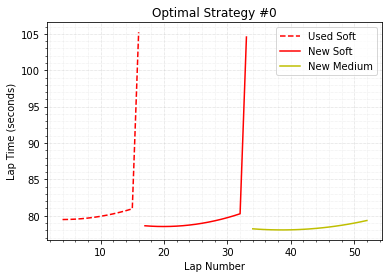

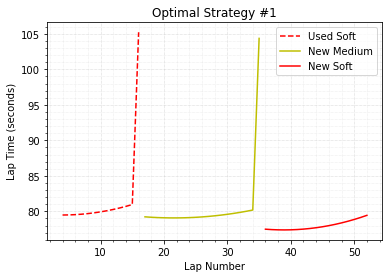

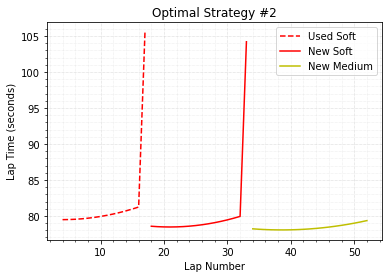

In [12]:
optimal_strategy = mu.find_optimum_strategy(laps_complete, total_race_laps, pitstop_time, current_tyre_description,
                                            current_tyre_age, need_to_use_different_tyre, tyre_deg_curve,
                                            base_laptime, fuel_laptime_correction, max_pitstops, batch_size, detailed_logs,
                                            soft_tyre_deg_quadratic = soft_tyre_deg_quadratic, soft_tyre_deg_linear = soft_tyre_deg_linear,
                                            medium_tyre_pace_deficit = medium_tyre_pace_deficit, medium_tyre_deg_quadratic = medium_tyre_deg_quadratic, medium_tyre_deg_linear = medium_tyre_deg_linear,
                                            hard_tyre_pace_deficit = hard_tyre_pace_deficit, hard_tyre_deg_quadratic = hard_tyre_deg_quadratic, hard_tyre_deg_linear = hard_tyre_deg_linear
                                           )
for i in range(0,len(optimal_strategy.index)):
    results_df = pd.DataFrame({'lap_number': optimal_strategy.iloc[i]['lap_number_list'],
                              'tyre_stint_number': optimal_strategy.iloc[i]['tyre_stint_number_list'],
                              'tyre_description': optimal_strategy.iloc[i]['tyre_description_list'],
                              'tyre_status': optimal_strategy.iloc[i]['tyre_status_list'],
                              'lap_time': optimal_strategy.iloc[i]['lap_times_adjusted']})
    mu.plot_laptimes(results_df, 'Optimal Strategy #{0}'.format(i))

Note here that there are in fact 3 strategies that minimise the total race time; all 3 are plotted.

## Finding optimal strategies across multiple tyre deg variables

The following code plots a heatmap of optimal strategies via a grid search across multiple tyre deg parameters. The idea here is to identify how close we are to the boundary of a different race strategy being optimal.

Again, we will assume quadratic tyre deg. For more details on the quadratic tyre deg function, please refer to the README document in the *modelling* folder.

In [13]:
laps_complete = 3
total_race_laps = 52
pitstop_time = 24
current_tyre_description = 'Soft'
current_tyre_age = 3
need_to_use_different_tyre = True

max_pitstops = 2
base_laptime = 76.52
fuel_laptime_correction = 0.06
detailed_logs = False
batch_size = 50000

# The following parameters will define the shape of the quadratic tyre deg curve
tyre_deg_curve = mu.tyre_deg_curve_quadratic
param1_range = np.arange(0.1, 0.2, 0.01) # Parameter 1 will be called 'k' later, and is the multiplicative factor by which each harder step of tyre compound has less degradation.
param2_range = np.arange(0.8, 1.3, 0.1) # Parameter 2 will be called 'd' later, and is the difference in seconds per lap between each step of tyre compound, without any degradation factor.

Finished optimising for k = 0.10 and d = 0.8
Finished optimising for k = 0.11 and d = 0.8
Finished optimising for k = 0.12 and d = 0.8
Finished optimising for k = 0.13 and d = 0.8
Finished optimising for k = 0.14 and d = 0.8
Finished optimising for k = 0.15 and d = 0.8
Finished optimising for k = 0.16 and d = 0.8
Finished optimising for k = 0.17 and d = 0.8
Finished optimising for k = 0.18 and d = 0.8
Finished optimising for k = 0.19 and d = 0.8
Finished optimising for k = 0.10 and d = 0.9
Finished optimising for k = 0.11 and d = 0.9
Finished optimising for k = 0.12 and d = 0.9
Finished optimising for k = 0.13 and d = 0.9
Finished optimising for k = 0.14 and d = 0.9
Finished optimising for k = 0.15 and d = 0.9
Finished optimising for k = 0.16 and d = 0.9
Finished optimising for k = 0.17 and d = 0.9
Finished optimising for k = 0.18 and d = 0.9
Finished optimising for k = 0.19 and d = 0.9
Finished optimising for k = 0.10 and d = 1.0
Finished optimising for k = 0.11 and d = 1.0
Finished o

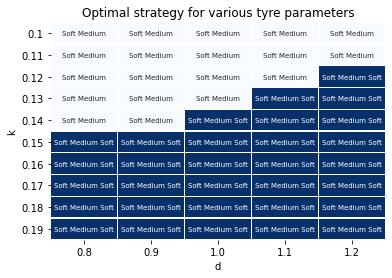

In [15]:
# Cross join to get all the possible combinations of parameters
parameter_grid = np.transpose([np.tile(param1_range, len(param2_range)), np.repeat(param2_range, len(param1_range))])
optimal_number_pitstops = []
optimal_tyre_choice = []
# Get the optimal strategy for these different parameter ranges
for i in range(0,len(parameter_grid)):
    row = parameter_grid[i]
    k = row[0]
    d = row[1]
    results_df = mu.find_optimum_strategy(laps_complete, total_race_laps, pitstop_time, current_tyre_description,
                                          current_tyre_age, need_to_use_different_tyre, tyre_deg_curve,
                                          base_laptime, fuel_laptime_correction, max_pitstops, batch_size, detailed_logs,
                                          soft_tyre_deg_quadratic = 0.012, soft_tyre_deg_linear = -0.01,
                                          medium_tyre_pace_deficit = d, medium_tyre_deg_quadratic = 0.012*k, medium_tyre_deg_linear = -0.01*k,
                                          hard_tyre_pace_deficit = 2*d, hard_tyre_deg_quadratic = 0.012*(k**2), hard_tyre_deg_linear = -0.01*(k**2))
    if results_df["pitstop_1_lap"][0] == -1:
        optimal_number_pitstops.append(0)
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]))
    elif results_df["pitstop_2_lap"][0] == -1:
        optimal_number_pitstops.append(1)
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]) + " " + str(results_df["pitstop_1_tyre"][0]))
    else:
        optimal_number_pitstops.append(2)
        alphabetical_tyres = [str(results_df["pitstop_1_tyre"][0]),str(results_df["pitstop_2_tyre"][0])]
        alphabetical_tyres.sort()
        optimal_tyre_choice.append(str(results_df["pitstop_0_tyre"][0]) + " " + alphabetical_tyres[0] + " " + alphabetical_tyres[1])
    print("Finished optimising for k = {:.2f} and d = {:.1f}".format(k,d))
parameter_df = pd.DataFrame(parameter_grid, columns = ['k','d'])
parameter_df = parameter_df.round({'k': 2, 'd': 1})
parameter_df["optimal_number_pitstops"] = optimal_number_pitstops
parameter_df["optimal_tyre_choice"] = optimal_tyre_choice
pivot_tab = parameter_df.pivot_table('optimal_number_pitstops', index = 'k', columns = 'd')
annotations = parameter_df.pivot_table('optimal_tyre_choice', index = 'k', columns = 'd', aggfunc = lambda x: ' '.join(x))
sns.heatmap(pivot_tab, annot = annotations, annot_kws={"size": 7}, fmt = '', cmap = 'Blues', cbar = False, linewidths=.3)
plt.xlabel("d")
plt.ylabel("k")
plt.title("Optimal strategy for various tyre parameters")
plt.show()